In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [146]:

def graph(x, y, top_offset=2, color='r', fit_line=True, connect=False):
    plt.ylim(ymin=0, ymax=(max(y) + top_offset))
    if connect:
        plt.plot(x, y, color + '-o')
    else:
        plt.plot(x, y, color + 'o')

    A = np.vstack([x, np.ones(len(x))]).T
    line, resid = np.linalg.lstsq(A, y)[:2] # fit line
    k, n = line[0], line[1]
    yfit = [k * xi + n for xi in x]
    if fit_line: plt.plot(x, yfit)
    return (line[0], line[1], resid / (len(x) * np.var(x)))

def B(B0, omega, omega0, beta):
    result = B0
    result /= ( (1-(omega/omega0)**2 )**2 + (2*beta/omega0)**2 * (omega/omega0)**2 )**0.5
    
    return result

2.493333333333333 2.4026666666666667
-0.111314308146 3.05692892534 0.000272267073616
-0.26398963688 3.24541367872 0.000272267073616


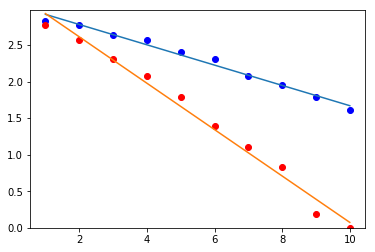

In [135]:
t0_neduseno = sum([12.42, 12.52, 12.46])/(3*5)
t0_duseno = sum([11.91, 12.03, 12.1])/(3*5)
print(t0_neduseno, t0_duseno)

a_neduseno = [19, 17, 16, 14, 13, 11, 10, 8, 7, 6, 5]
a_duseno = [19, 16, 13, 10, 8, 6, 4, 3, 2.3, 1.2, 1]

# lineariziran
x = list(range(1, 11, 1))
y = [np.log(a_neduseno[i]) for i in range(1, len(a_neduseno), 1)]
beta_neduseno, A0_neduseno, beta_neduseno_err = graph(x, y, top_offset=0.2, color='b')
beta_neduseno /= t0_neduseno/2

y = [np.log(a_duseno[i]) for i in range(1, len(a_duseno), 1)]
beta_duseno, A0_duseno, beta_duseno_err = graph(x, y, top_offset=0.2)
beta_duseno /= t0_duseno/2

print(beta_neduseno, A0_neduseno, beta_neduseno_err[0])
print(beta_duseno, A0_duseno, beta_neduseno_err[0])


-0.26398963688 3.24541367872


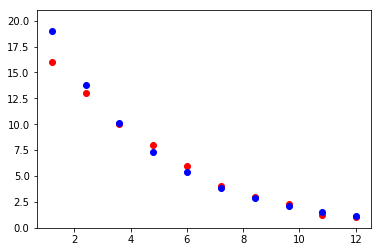

In [136]:
times = [(t0_duseno/2)*i for i in range(1, 11, 1)]
graph(times, a_duseno[1:], fit_line=False)

izracunani = [a_duseno[0] * np.e ** (beta_duseno*(t0_duseno/2)*i) for i in range(len(times))]

graph(times, izracunani, color='b', fit_line=False)
print(beta_duseno, A0_duseno)

In [137]:
meritve_vsiljeno_neduseno = {
    0.1: (0.4, 0),
    0.15: (0.5, 0),
    0.2: (0.7, 0),
    0.25: (0.8, 0),
    0.3: (0.9, 0),
    0.325: (0.95, 0),
    0.35: (1, 0),
    0.375: (1.1, 0),
    0.4: (1.9, 0.3),
    0.41: (2.2, 0.3),
    0.42: (2.6, 0.6),
    0.43: (2.6, 0.7),
    0.44: (2.1, 0.9),
    0.45: (2, 1),
    0.46: (1.5, 0.9),
    0.47: (1.2, 0.8),
    0.48: (1.1, 0.8),
    0.49: (1, 0.8),
    0.5: (0.9, 0.8),
    0.525: (0.8, 0.8),
    0.55: (0.7, 1),
    0.575: (0.5, 1),
    0.6: (0.4, 1),
}

meritve_vsiljeno_duseno = {
    0.1: (0.4, 0),
    0.15: (0.5, 0),
    0.2: (0.7, 0),
    0.25: (0.8, 0),
    0.3: (0.8, 0),
    0.35: (1, 0),
    0.375: (1.2, 0.5),
    0.4: (1.5, 0.5),
    0.41: (2, 0.6),
    0.42: (1.9, 0.6),
    0.43: (1.8, 0.7),
    0.44: (1.7, 0.8),
    0.45: (1.6, 0.8),
    0.475: (1.2, 0.9),
    0.5: (1.1, 1),
    0.55: (0.9, 1),
    0.575: (0.8, 0.9),
    0.6: (0.6, 0.8),
}

In [138]:
B0_neduseno = meritve_vsiljeno_neduseno[0.1][0]
B0_duseno = meritve_vsiljeno_duseno[0.1][0]

omega_d_neduseno = 2 * np.pi / t0_neduseno
omega_d_duseno = 2 * np.pi / t0_duseno

omega_0_neduseno = (omega_d_neduseno**2 + beta_neduseno**2)**0.5
omega_0_duseno = (omega_d_duseno**2 + beta_duseno**2)**0.5

(1.3743794734456327, 1.5740996380146011, array([ 11.90545915]))

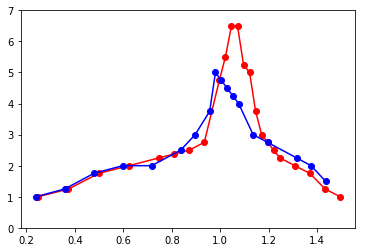

In [133]:
# obe meritvi v en graf
x1 = [i*2*np.pi/omega_0_neduseno for i in list(meritve_vsiljeno_neduseno.keys())]
y1 = [meritve_vsiljeno_neduseno[k][0]/B0_neduseno for k in meritve_vsiljeno_neduseno.keys()]
graph(x1, y1, fit_line=False, connect=True)

x2 = [i*2*np.pi/omega_0_duseno for i in list(meritve_vsiljeno_duseno.keys())]
y2 = [meritve_vsiljeno_duseno[k][0]/B0_duseno for k in meritve_vsiljeno_duseno.keys()]
graph(x2, y2, fit_line=False, color='b', connect=True)

(0.11116613563409673, 1.2714521240295795, array([ 12.79848775]))

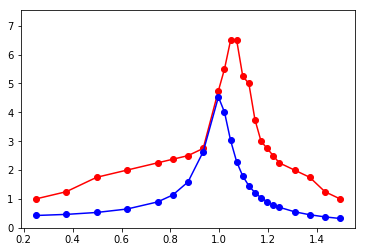

In [148]:
# neduseno
x1 = [i*2*np.pi/omega_0_neduseno for i in list(meritve_vsiljeno_neduseno.keys())]
y1 = [meritve_vsiljeno_neduseno[k][0]/B0_neduseno for k in meritve_vsiljeno_neduseno.keys()]
graph(x1, y1, fit_line=False, connect=True)

y2 = [B(B0_neduseno, i*2*np.pi, omega_0_neduseno, beta_neduseno) for i in list(meritve_vsiljeno_neduseno.keys())]
graph(x1, y2, fit_line=False, color='b', connect=True, top_offset=3)

(0.34590079789537259, 0.76869143472506218, array([ 3.19750713]))

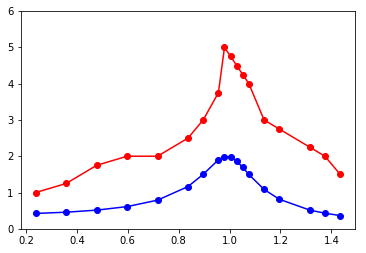

In [150]:
# duseno
x1 = [i*2*np.pi/omega_0_duseno for i in list(meritve_vsiljeno_duseno.keys())]
y1 = [meritve_vsiljeno_duseno[k][0]/B0_duseno for k in meritve_vsiljeno_duseno.keys()]
graph(x1, y1, fit_line=False, connect=True)

y2 = [B(B0_duseno, i*2*np.pi, omega_0_duseno, beta_duseno) for i in list(meritve_vsiljeno_duseno.keys())]
graph(x1, y2, fit_line=False, color='b', connect=True, top_offset=4)

(159.42084711574296, -86.256064914615649, array([ 8972.44901413]))

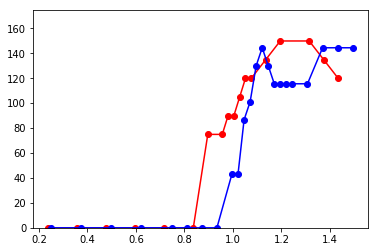

In [166]:
# fazni zamik
x1 = [i*2*np.pi/omega_0_duseno for i in list(meritve_vsiljeno_duseno.keys())]
y1 = [meritve_vsiljeno_duseno[k][1]/t0_duseno*360 for k in meritve_vsiljeno_duseno.keys()]
graph(x1, y1, fit_line=False, connect=True, top_offset=0.1)

x2 = [i*2*np.pi/omega_0_neduseno for i in list(meritve_vsiljeno_neduseno.keys())]
y2 = [meritve_vsiljeno_neduseno[k][1]/t0_neduseno*360 for k in meritve`